In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pytreebank
from keras_preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from bert_embedding import BertEmbedding

Using TensorFlow backend.


In [2]:
sst_data = pytreebank.load_sst()
train = sst_data['train']
bert = BertEmbedding()

In [35]:
x_list = []
y_list = []
for t in train[:5]:
    y, x = t.to_labeled_lines()[0]
    y_list.append(y)
    str_list, arr_list = zip(*bert([x]))
    x_list.append(np.squeeze(np.asarray(arr_list)))
    print(x_list[-1].shape)

(23, 768)
(22, 768)
(22, 768)
(20, 768)
(8, 768)


In [36]:
len_list = [i.shape[0] for i in x_list]
max_len = max(len_list)
min_len = min(len_list)
print(str(max_len), str(min_len))

23 8


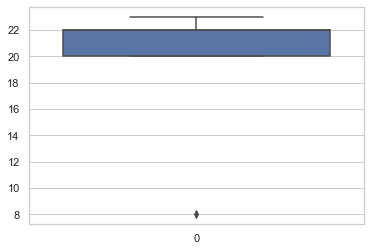

In [37]:
sns.set(style="whitegrid")
ax = sns.boxplot(data=len_list)
plt.show()

In [38]:
np.percentile(len_list, 1)

8.48

In [40]:
# filter shortest sentences out
print(len(y_list))
print(len(x_list))
for z in zip(y_list, x_list):
    print(z[1].shape)
y_x_filtered = [z for z in zip(y_list, x_list) if z[1].shape[0] > 10]
y_list, x_list = zip(*y_x_filtered)
len(x_list)

5
5
(23, 768)
(22, 768)
(22, 768)
(20, 768)
(8, 768)


4

In [41]:
# pad_sequences is only for 1D representations of words! That's why we can't use it with vectors
padded = pad_sequences(x_list, maxlen=max_len+2, dtype='float32', padding='post')
padded.shape

(4, 25, 768)

In [42]:
padded[0][1]

array([ 1.80278644e-02, -2.00907022e-01,  2.66962230e-01,  7.92737454e-02,
        4.62205410e-01, -3.68802875e-01,  7.29660153e-01,  1.55805767e-01,
        8.92768025e-01, -1.32665604e-01, -2.04467341e-01,  7.28202760e-02,
        1.93984792e-01,  4.86145914e-01,  3.02444011e-01,  1.30711913e-01,
       -2.65286744e-01,  3.48616764e-02,  6.13465048e-02,  1.02056861e+00,
       -5.12630820e-01,  7.31045127e-01, -1.37157276e-01, -5.29961884e-01,
        1.62006572e-01,  2.29670033e-01, -3.72539580e-01,  5.72816491e-01,
       -7.69605875e-01,  5.06260991e-01, -1.26137361e-01,  2.13201866e-01,
       -3.08229085e-02,  4.32605222e-02, -6.16786599e-01, -2.70177573e-01,
        8.03867340e-01, -1.40161395e-01,  1.35342717e-01, -8.19666922e-01,
        3.22212636e-01, -2.78932065e-01,  7.31286705e-01,  4.52475995e-01,
       -7.58527815e-01, -5.96829206e-02,  6.69355989e-02,  5.00991523e-01,
        6.27489448e-01, -2.33609974e-01,  2.47959659e-01,  4.88070309e-01,
       -3.24314773e-01, -

In [43]:
padded[0][-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
padded[0].shape

(25, 768)

In [45]:
for i in padded:
    print(i.shape)
x_arr = np.asarray(padded)
y_arr = np.asarray(y_list)
print(x_arr.shape)
print(y_arr.shape)

(25, 768)
(25, 768)
(25, 768)
(25, 768)
(4, 25, 768)
(4,)


### A few of the things I tried that didn't work

In [ ]:
def np_pad(sequences, shape):
    padded = np.zeros(shape)
    for s in sequences:
        padded = np.zeros(shape)
        padded[:s.shape[0],:s.shape[1]] = s

In [ ]:
# for np.pad() you cannot specify a desired shape, it will always add a constant number of zeros
for i in x_list:
    i = np.pad(i, (25, 768), 'constant')
    print(i.shape)